In [24]:
#Importamos las librerias a utilizar...
import pyarrow.parquet as pq
import pandas as pd
import json

# Google Maps Dataset

Primero empezaremos a explorar el dataset de Google Maps para dar un pequeño análisis de los datos que contiene y la información superficial que podemos encontrar.

Al extraer y descomprimir los datos podemos observar que tenemos dos tipos de datasets, uno de metadata sitios y el otro con el nombre de reviews-estados.

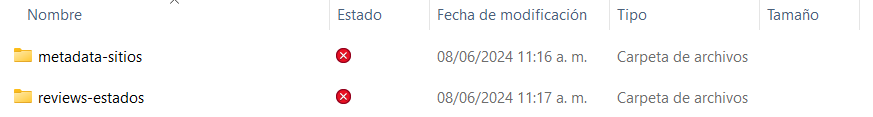

Primero nos centraremos en el dataset de metadata-sitios para leer y explorar su contenido.

## Metadata - sitios

Dentro de la carpeta tenemos 11 archivos tipo .json, vamos a abrir 3 de estos archivos para explorar un poco de su contenido.

In [2]:
#Leemos los archivos .json
df_1 = pd.read_json('..\\RawData\\GoogleMaps\\metadata-sitios\\1.json', lines= True)
df_6 = pd.read_json('..\\RawData\\GoogleMaps\\metadata-sitios\\6.json', lines= True)
df_11 = pd.read_json('..\\RawData\\GoogleMaps\\metadata-sitios\\11.json', lines= True)

In [3]:
#Vemos la información del primer dataframe
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275001 entries, 0 to 275000
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              274994 non-null  object 
 1   address           264939 non-null  object 
 2   gmap_id           275001 non-null  object 
 3   description       13155 non-null   object 
 4   latitude          275001 non-null  float64
 5   longitude         275001 non-null  float64
 6   category          272740 non-null  object 
 7   avg_rating        275001 non-null  float64
 8   num_of_reviews    275001 non-null  int64  
 9   price             13450 non-null   object 
 10  hours             192448 non-null  object 
 11  MISC              194972 non-null  object 
 12  state             195523 non-null  object 
 13  relative_results  238771 non-null  object 
 14  url               275001 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 31.5+ MB


Podemos observar que tenemos 15 columnas con diferentes datos y tipos. Desde enteros, objetos y flotantes. Vamos a realizar un head para ver una pequeña porción de los datos.

In [4]:
df_1.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


Podemos observar que tenemos datos interesantes en este dataset. Contamos con el nombre del establecimiento, con su ubicación (tanto dirección, como longitud y latitud), con la categoria del negocio en tipo lista, en la calificación del lugar, horarios de apertura y cierre.

Habría que hacer algun tratamiento de datos ya que contamos con columnas que sus datos son listas o diccionarios y hay que separarlos para poder tener una lectura y datos más prolijos para trabajar con ellos. 

También podemos observar que tenemos columnas con datos vacios o "none". Luego tendremos que ver que hacer con esos datos faltantes.

En esta ocasión nos centraremos en hacer un análisis muy superficial de los datos, por lo que continuaremos con la lectura y despliegue de los demás archivos que importamos.

In [5]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275001 entries, 0 to 275000
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              275001 non-null  object 
 1   address           267689 non-null  object 
 2   gmap_id           275001 non-null  object 
 3   description       19781 non-null   object 
 4   latitude          275001 non-null  float64
 5   longitude         275001 non-null  float64
 6   category          273513 non-null  object 
 7   avg_rating        275001 non-null  float64
 8   num_of_reviews    275001 non-null  int64  
 9   price             21297 non-null   object 
 10  hours             201864 non-null  object 
 11  MISC              210667 non-null  object 
 12  state             206651 non-null  object 
 13  relative_results  249121 non-null  object 
 14  url               275001 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 31.5+ MB


In [6]:
df_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275001 entries, 0 to 275000
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              274999 non-null  object 
 1   address           270246 non-null  object 
 2   gmap_id           275001 non-null  object 
 3   description       37189 non-null   object 
 4   latitude          275001 non-null  float64
 5   longitude         275001 non-null  float64
 6   category          274019 non-null  object 
 7   avg_rating        275001 non-null  float64
 8   num_of_reviews    275001 non-null  int64  
 9   price             42727 non-null   object 
 10  hours             218334 non-null  object 
 11  MISC              230490 non-null  object 
 12  state             222976 non-null  object 
 13  relative_results  256979 non-null  object 
 14  url               275001 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 31.5+ MB


Como podemos observar las columnas son las mismas, pero con datos diferentes, al parecer los 11 archivos .json se rigen bajo la misma estructura para segmentar toda la información. Es un dataset bastante grande que habría que juntar en alguna erramienta de bigdata.

### Conclusiones:
El data set primordialmente contiene:

- Nombre (del establecimiento)
- Dirección (calles)
- gmap_id (identificador para ligar con las reviews)
- Latitud y longitud
- Rating
- Horas de cierre y apertura
- Categoria

## Reviews - Estados

Ahora vamos a analizar de la misma manera el contenido del dataset de reviews-estados. En este dataset tenemos muchos sub folders con los que trabajar como podemos observar:

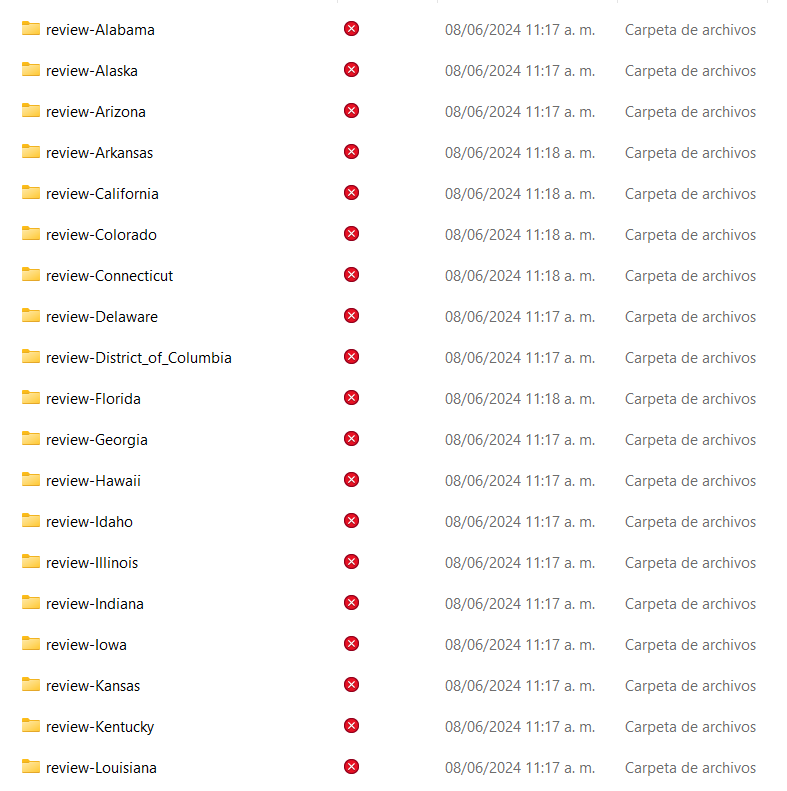

Y dentro de estos sub-folders tenemos variados archivos tipo .json. Vamos a leer solamente un archivo de un sub-folder para ver que datos contiene y darnos una idea de que hacer con ellos.

In [7]:
df_review = pd.read_json('..\\RawData\\GoogleMaps\\reviews-estados\\review-Idaho\\1.json', lines= True)

In [8]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  150000 non-null  float64
 1   name     150000 non-null  object 
 2   time     150000 non-null  int64  
 3   rating   150000 non-null  int64  
 4   text     91357 non-null   object 
 5   pics     3751 non-null    object 
 6   resp     25550 non-null   object 
 7   gmap_id  150000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.2+ MB


In [9]:
df_review.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.078421e+20,Jason Johnson,1499810222323,3,"Nice place, but not enough dog friendly areas ...",[{'url': ['https://lh5.googleusercontent.com/p...,None,0x54af0dfadab474e1:0x3ae5c949132941d8
1,1.035121e+20,Michael Harry,1478021694645,5,"Pheasant, ducks, geese, white tailed deer.\nSm...",None,None,0x54af0dfadab474e1:0x3ae5c949132941d8
2,1.102976e+20,Jolene Vaughn,1533847989090,3,"We took some horses up to ride, but there real...",None,None,0x54af0dfadab474e1:0x3ae5c949132941d8
3,1.150576e+20,Ben Voris,1563297497573,3,Crowded during pheasant season. If you’re not ...,None,None,0x54af0dfadab474e1:0x3ae5c949132941d8
4,1.049081e+20,Sunshine Window Cleaning Inc. Greg Reid,1543076221896,4,Beautiful spot for a hike or some hunting. Be ...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x54af0dfadab474e1:0x3ae5c949132941d8


En este dataset podemos observar que tenemos a los usuarios y sus reseñas de los lugares que visitan. Para ligar los datasets se tendría que utilizar el gmap_id, con esto podremos sacar el lugar y sus reseñas para un análisis más profundo de dicho establecimiento.

Las reseñas se dividen por los diferentes estados de EUA, si juntaramos todos los archivos tendríamos muchísima información, por lo que hay que determinar si se va a trabajar con todos los datos o por regiones o ver la manera de segmentar nuestros datos.

Estas son las regiones en las que se podrían segmentar los datos:

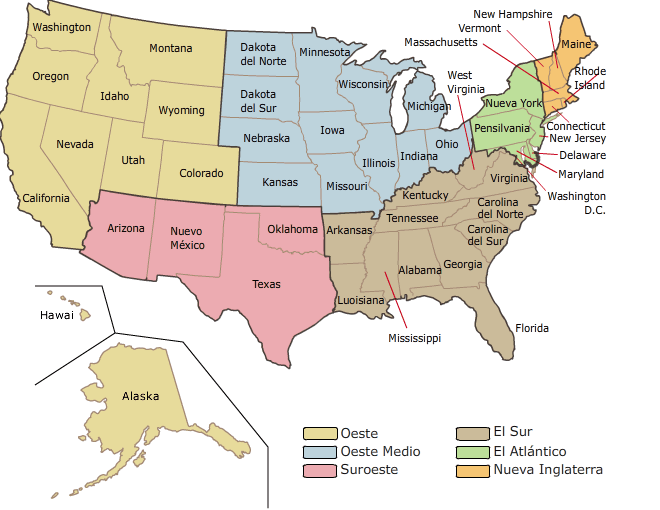

### Conclusiones del dataset.


El dataset primordialmente contiene:
- ID del usuario
- Nombre del usuario
- La calificación que le dió al establecimiento
- Una reseña tipo string
- El gmap_id del establecimiento que calificó

# YELP Dataset

Para este dataset vamos a tener archivos bastante peculiares que analizar:

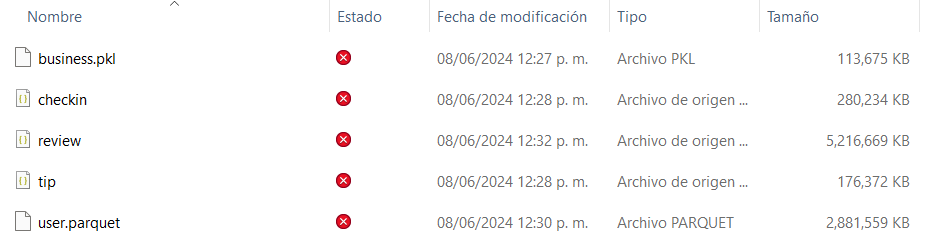

Como se puede observar, tenemos archivos *muy* pesados, archivos con formato .json, .parquet y .pkl.  En lo personal nunca he trabajado con archivos .pkl, por lo que trataremos de realizar su apertura para observar su contenido.

Para estos archivos hay que analizar cada unos para ver su contenido, por lo cual se hará por separado y se anotará que es lo que contiene para tener la información más a la mano y no estar abriendo los archivos cada vez.

## ChekIn Dataset
Comenzamos con el primer dataset, un archivo en tipo .json con un pedo de 273.666 MBs.

In [10]:
#Importamos nuestro archivo
df_checkin = pd.read_json('..\\RawData\\Yelp\\checkin.json', lines= True)

In [11]:
df_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [12]:
df_checkin.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


Es un dataset curioso, ya que es un archivo bastante grande pero solo cuenta con dos columnas, la de 'business_id' y la de 'date'. La columna 'date' tiene varias fechas separadas por comas, hay que indagar en los demás archivos para ver como relacionarlo o para que nos serviría este dataset.

## Review Dataset
Este archivo igualmente es .json y cuenta con un peso de 4.97 GB. Un archivo sumamente grande para estar en formato json.

In [17]:
#Para leer este archivo tan pesado vamos a tener que utilizar un método para leerlo en partes
file_path = '..\\RawData\\YELP\\review.json'
data = []

with open(file_path, 'r') as file:
    contador = 0
    for line in file:
        data.append(json.loads(line))
        if contador == 100:
            break
        contador += 1
        
# Si necesitas convertirlo en un DataFrame
df_review = pd.DataFrame(data)

In [19]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    101 non-null    object 
 1   user_id      101 non-null    object 
 2   business_id  101 non-null    object 
 3   stars        101 non-null    float64
 4   useful       101 non-null    int64  
 5   funny        101 non-null    int64  
 6   cool         101 non-null    int64  
 7   text         101 non-null    object 
 8   date         101 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.2+ KB


In [20]:
df_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


Para su lectura leeimos simplemente las primeras 100 lineas del archivo para poder explorar un poco nuestros datos, aquí lo más interesante es que tenemos reviews escritas, tenemos el ID del negocio , del usuario y el id de cada review. Con esto podemos ligar nuestras tablas para poder extraer más datos. Se liga al primer dataset con el business_id.

## Tip Dataset
Este dataset también cuenta con formato .json y con un peso de 172.23 MB.

In [21]:
df_tip = pd.read_json('..\\RawData\\Yelp\\tip.json', lines= True)

In [22]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


In [23]:
df_tip.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


Este dataset se parece bastante al pasado, ya que contiene una review en tipo string, también el ID del usuario y del negocio. La columna de fecha tal vez se refiera a la fecha en la que fue hecha la review.

## User Dataset
Este dataset se encuentra en un formato .parquet y con un peso de 2.74 GB. Por su gran peso trataremos de utilizar un método similar al de 5GB de extraer solo una parte del dataset para su visualización.

In [ ]:
# Especifica la ruta del archivo Parquet
file_path = '..\\RawData\\YELP\\user.parquet'

# Leer el archivo Parquet en chunks
def process_parquet_in_chunks(file_path, chunksize=100000):
    parquet_file = pq.ParquetFile(file_path)
    number_of_rows = parquet_file.metadata.num_rows
    chunks = []

    for start in range(0, number_of_rows, chunksize):
        end = min(start + chunksize, number_of_rows)
        chunk = parquet_file.read_row_group(start // chunksize, columns=None)
        chunks.append(chunk.to_pandas())

    return pd.concat(chunks, ignore_index=True)

# Procesar el archivo Parquet
df_review = process_parquet_in_chunks(file_path)